In [1]:
import os
from sklearn.model_selection import KFold
from joblib import dump

from methods.preprocessing import *
from methods.extract_features import *
from methods.ml import *
from methods.image_enhancement import apply_pca

In [2]:
train_dir = "../data/fer-2013-data/train"
for dirpath,dirname,filenames in os.walk(train_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in train
There are 0 directories and 3995 images in train\angry
There are 0 directories and 436 images in train\disgust
There are 0 directories and 4097 images in train\fear
There are 0 directories and 7215 images in train\happy
There are 0 directories and 4965 images in train\neutral
There are 0 directories and 4830 images in train\sad
There are 0 directories and 3171 images in train\surprise


In [3]:
X_train, y_train = load_dataset(train_dir)
# make it 2D for basic knn_classifier
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

print("Improvement on dataset:")
print("1-Remove disgust directory")
print("2-Limit happy images to 5000\n")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Improvement on dataset:
1-Remove disgust directory
2-Limit happy images to 5000

X_train shape: (26058, 48, 48)
y_train shape: (26058,)


In [4]:
# Extract features using LBP
X_features_lbp = extract_features(X_train=X_train, feature_method="LBP")
# Extract features using HOG
X_features_hog = extract_features(X_train=X_train, feature_method="HOG")
# Apply PCA to reduce dimensionality
X_pca_lbp, _ = apply_pca(X_features_lbp)
X_pca_hog, _ = apply_pca(X_features_hog)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

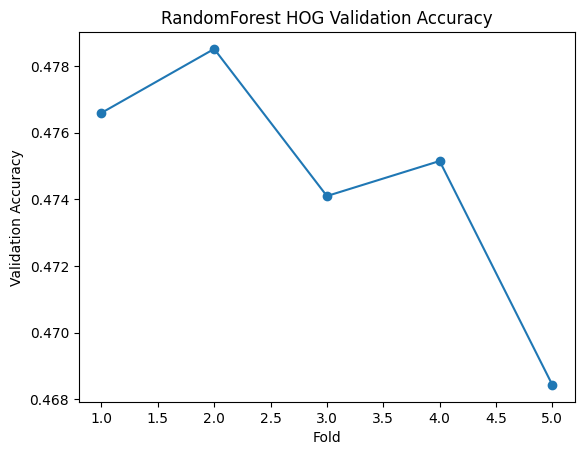

Average Validation Accuracy: 0.47455654569787364


In [5]:
rf_classifier_hog = RFClassifier()
fold_accuracies = []

for train_index, test_index in kf.split(X_features_hog):
    X_train_fold, X_test_fold = X_features_hog[train_index], X_features_hog[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train and evaluate RandomForest
    rf_classifier_hog.train(X_train_fold, y_train_fold)
    predictions = rf_classifier_hog.predict(X_test_fold)
    fold_accuracies.append(accuracy_score(y_test_fold, predictions))

# Visualize validation accuracy
plt.plot(range(1, len(fold_accuracies) + 1), fold_accuracies, marker='o')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.title('RandomForest HOG Validation Accuracy')
plt.show()

# Save the model
dump(rf_classifier_hog, "joblib/rf_classifier_hog.joblib")

# Print average validation accuracy
print("Average Validation Accuracy:", np.mean(fold_accuracies))

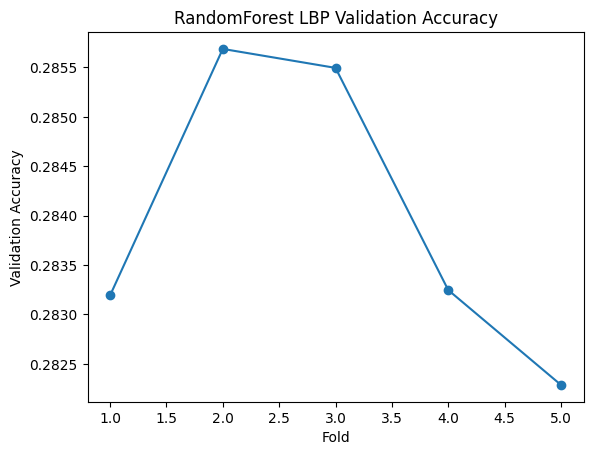

Average Validation Accuracy: 0.2839817933402288


In [ ]:
rf_classifier_lbp = RFClassifier()
fold_accuracies = []

for train_index, test_index in kf.split(X_features_lbp):
    X_train_fold, X_test_fold = X_features_lbp[train_index], X_features_lbp[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train and evaluate RandomForest
    rf_classifier_lbp.train(X_train_fold, y_train_fold)
    predictions = rf_classifier_lbp.predict(X_test_fold)
    fold_accuracies.append(accuracy_score(y_test_fold, predictions))

# Visualize validation accuracy
plt.plot(range(1, len(fold_accuracies) + 1), fold_accuracies, marker='o')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.title('RandomForest LBP Validation Accuracy')
plt.show()

# Save the model
dump(rf_classifier_lbp, "joblib/rf_classifier_lbp.joblib")

# Print average validation accuracy
print("Average Validation Accuracy:", np.mean(fold_accuracies))

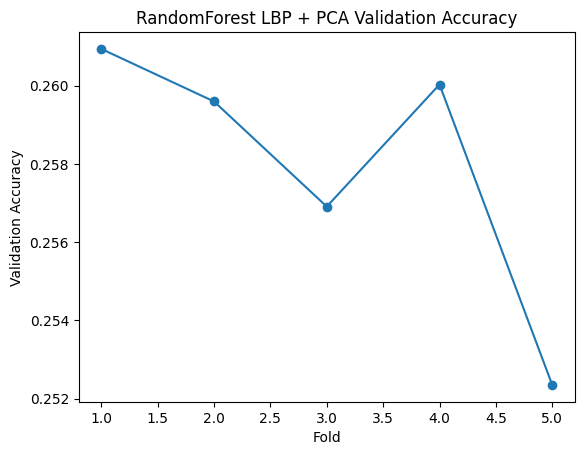

Average Validation Accuracy: 0.25796286944215796


In [ ]:
rf_classifier_lbp_pca = RFClassifier()
fold_accuracies = []

for train_index, test_index in kf.split(X_pca_lbp):
    X_train_fold, X_test_fold = X_pca_lbp[train_index], X_pca_lbp[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Train and evaluate RandomForest
    rf_classifier_lbp_pca.train(X_train_fold, y_train_fold)
    predictions = rf_classifier_lbp_pca.predict(X_test_fold)
    fold_accuracies.append(accuracy_score(y_test_fold, predictions))

# Visualize validation accuracy
plt.plot(range(1, len(fold_accuracies) + 1), fold_accuracies, marker='o')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.title('RandomForest LBP + PCA Validation Accuracy')
plt.show()

# Save the model
dump(rf_classifier_lbp_pca, "joblib/rf_classifier_lbp_pca.joblib")

# Print average validation accuracy
print("Average Validation Accuracy:", np.mean(fold_accuracies))